In [226]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

BEER = 0
ADULT = 1
SCHOOL = 2
SEGMENTS = [BEER, ADULT, SCHOOL]
BOAT_SIZE = 6*30

## Population

(array([ 7., 12., 24., 30., 54., 48., 39., 21., 13.,  8.]),
 array([ 65.83891868,  70.56131644,  75.2837142 ,  80.00611196,
         84.72850972,  89.45090748,  94.17330524,  98.89570301,
        103.61810077, 108.34049853, 113.06289629]),
 <BarContainer object of 10 artists>)

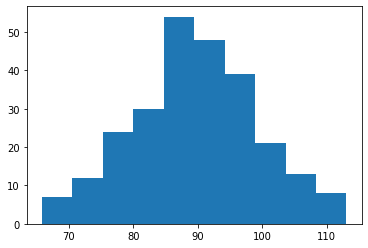

In [233]:
beer_lovers = np.random.normal(90, 10, 256)
plt.hist(beer_lovers)

(array([  1.,   3.,  34., 158., 372., 602., 480., 255.,  77.,  18.]),
 array([ 32.90500135,  40.23499783,  47.56499431,  54.89499079,
         62.22498727,  69.55498375,  76.88498023,  84.21497671,
         91.54497319,  98.87496968, 106.20496616]),
 <BarContainer object of 10 artists>)

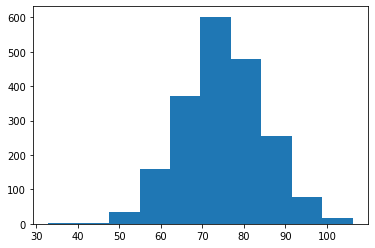

In [234]:
adults = np.random.normal(75, 10, 2000)
plt.hist(adults)

(array([  8.,  38., 101., 150., 124.,  64.,  18.,   5.,   5.,   7.]),
 array([17.71906262, 25.17886693, 32.63867124, 40.09847555, 47.55827986,
        55.01808417, 62.47788848, 69.93769279, 77.3974971 , 84.85730141,
        92.31710572]),
 <BarContainer object of 10 artists>)

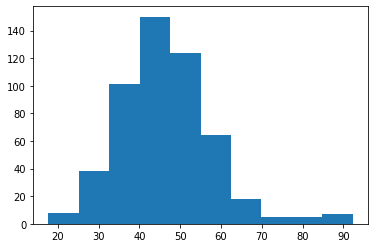

In [235]:
teachers = np.random.normal(75, 10, 20)
kids = np.random.normal(45, 10, 500)
schools = np.concatenate([teachers, kids])
plt.hist(schools)

In [236]:
anons = np.empty(365)
anons[:] = np.nan
body_weights = np.concatenate([beer_lovers, adults, schools, anons])
body_weights[np.random.choice(len(body_weights), replace=False, size=127)] = np.nan
segments = np.concatenate([
    np.full(len(beer_lovers), BEER),
    np.full(len(adults), ADULT),
    np.full(len(schools), SCHOOL),
    anons
])
df_pop = pd.DataFrame({'body_weight': body_weights, 'segment': segments})

df_pop

,body_weight,segment
0,86.146332,0.0
1,75.826937,0.0
2,101.594190,0.0
3,95.545861,0.0
4,112.520604,0.0
...,...,...
3136,NaN,NaN
3137,NaN,NaN
3138,NaN,NaN
3139,NaN,NaN


In [237]:
df_pop.groupby('segment').mean()

,body_weight
segment,
0.0,89.788812
1.0,75.098258
2.0,46.764238


(array([ 256.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
         520.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

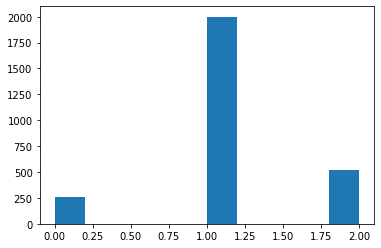

In [238]:
plt.hist(df_pop.segment)

## Trips

In [239]:
n_trips = 52*7
beer_prob = 0.25
rows = []
for trip_id in range(n_trips):
    weekday = np.random.randint(0,7)
    serves_beer = weekday >= 5 and np.random.random() < beer_prob
    # calculate sample props
    if weekday < 5:
        # oversample school
        weights = np.ones(len(df_pop))
        weights[df_pop.segment == SCHOOL] = 10
    elif serves_beer:
        # undersample school, oversample powerlifters
        weights = np.ones(len(df_pop))
        weights[df_pop.segment == POWER] = 30
        weights[df_pop.segment == ADULT] = 5
        weights[df_pop.segment == SCHOOL] = 1
    else:
        # random sample
        weights = np.ones(len(df_pop))
    gasts = df_pop.sample(BOAT_SIZE, weights = weights, replace=False).values
    for body_weight, segment in gasts:
        rows.append([trip_id, weekday, serves_beer, body_weight, segment])
df_trip = pd.DataFrame(rows, columns=['trip_id', 'weekday', 'serves_beer', 'body_weight', 'segment'])

(array([2077.,    0.,    0.,    0.,    0., 3030.,    0.,    0.,    0.,
         188.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

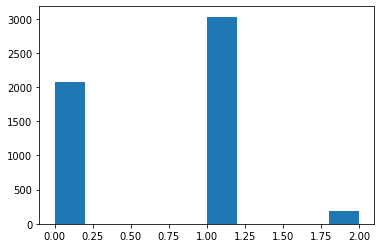

In [241]:
plt.hist(df_trip[df_trip.serves_beer].segment)

## Save data

In [242]:
df_pop.to_csv('population.csv', index=False)
df_trip.to_csv('trips.csv', index=False)